# Hormone Workshop



Today we will look at how computers can help when analysing and comparing large datasets, and can provide extra analysis that we are unable to do by hand.

In this workshop we are trying to improve the diagnostic outcome of patients with disease by looking at data from patients, comparing them to a control dataset, and seeing if we can use computers to help us understand the data and pull out significant factors which may not have been obvious previously.

By looking at the dataset, we will also consider if there are any other data points which may be useful in diagnosis and how this may reflect on results.

In this workshop we will cover:

- how to handle datasets
- data analysis using python
- data visualisation
- outliers and anomalies
- data classification
- considering the effect of data on the results
- consider patient outcomes and perspectives
- uncertainty and likelihood of disease

<span style="color:blue">Look out for the text written in blue, these are tasks you need to complete.</span>

# Task 1 

You should have already analysed the patient and control datasets using the deck of cards, and made a note of what the key differences were between the two datasets. Imagine if you had to analyse all the data by hand for the whole of the NHS?! That would take far too long.

We can use computers to quickly analyse the data and plot graphs so it's presented in a way that's easy to understand.
There are many ways to do this, but here we will use Python code....

**Step 1:** <span style="color:blue">Look at the excel spreadsheet labelled "Participant Data.csv" which contains all the participant data. It is located on the left hand side, double click to open. Look at the file so you are familiar with what data it includes. </span> 

This file should contain all the information that you previously saw on the individual cards, for each patient.

In the spreadsheet, 0 or 1 are used when there are two choices for an answer, E.g. yes or no, male or female.

For this data:

Condition: 0 = Control, 1 = Patient

Sex: 0 = Female, 1 = Male

Smoker: 0 = No, 1 = Yes

**Step 2:** Now we are going to plot this data using Python code, so it is easier to visualise and interpret the data using graphs.

Whenever we start coding, we have to import certain packages (such as **numpy**, **pandas** and **matplotlib.pyplot**) that allow us to plot graphs. We can also set up some things at the very beginning to save us time later, such as defining the plot colours of the graphs, which is what we have done here in the code below with **plot_color** and **colorplot**.

**Run the below section of code. To do this, click on the secition of code so it is highlighted in a green or blue box, then run the code by clicking Shift(⬆) and Enter at the same time...**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style
!pip install scikit-learn
import sklearn
from sklearn.svm import SVC
plot_color = np.array([[166, 206, 227], [31, 120, 180], [178, 223, 138], 
                       [51, 160, 44], [251, 154, 153], [227, 26, 28], 
                       [253, 191, 111], [255, 127, 0], [202, 178, 214], 
                       [106, 61, 154]]) / 256
colorplot = np.array([[0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], 
                      [0.9290, 0.6940, 0.1250], [0.3010, 0.7450, 0.9330], 
                      [0.6350, 0.0780, 0.1840]])

print(Fore.RED + "Congratulations! This section has ran successfully!")

**Step 3:** To plot the graphs, we need to load in the data file "Participant Data.csv" first, and define each column of data within the code.

The first line of the code below loads the excel file containing the data.

**Task:** <span style="color:blue">Where it says "ENTER DATA FILE", insert the name of the excel file containing the data ;  'Participant Data.csv'.</span>

Here we are loading in the data from the excel file and labelling each column. Take a minute to look at how we are labelling each column from the spreadsheet, does this make sense to you? If not ask a researcher to explain!

**Run this section of code...**


In [5]:
Participant_data = pd.read_csv('Participant Data.csv').to_numpy()

#Here we are assigning each column of data a name we can use in the code, where [row:column]
#For example; participant = [:, 0] = 1st row in the spreadsheet, where ':' means'all rows'

participant = Participant_data[:, 0]
condition = Participant_data[:, 1]
sex = Participant_data[:, 2]
smoker = Participant_data[:, 3]
age = Participant_data[:, 4]
height = Participant_data[:, 5]
BMI = Participant_data[:, 6]
hormone = Participant_data[:, 7]

print(Fore.RED + "Congratulations! This section has ran successfully and we have labelled the data!")

Congratulations! This section has ran successfully and we have labelled the data!


**Step 4:** The next section of code will plot graphs showing the distribution for each column of data:
- Male and Female 
- Smokers
- Age 
- Height
- BMI
- 8am Hormone

Control and patient data will be plotted on the same graph.

By using coding we can very quickly plot data and see results way quicker than doing it by hand!

**Run this section of code...**


C:\Users\delaneya\AppData\Local\Temp\ipykernel_9596\3325307742.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


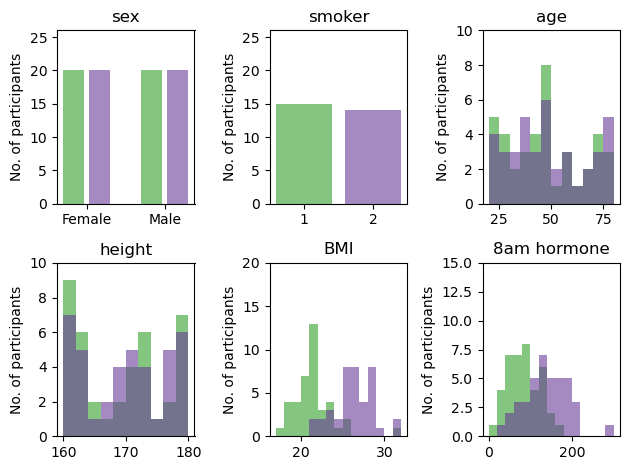

In [6]:
# Count number of controls and patients
Controls = np.where(condition == 0)[0]
NC = len(Controls)
Patients = np.where(condition == 1)[0]
NP = len(Patients)

# Compare controls and patients
plt.figure()
plt.gcf().set_facecolor('w')

#Plots Sex - Male and Female
plt.subplot(2, 3, 1)
plt.title('sex')
plt.bar(1, len(np.where((condition == 0) & (sex == 0))[0]), color=plot_color[3, :], alpha=0.6)
plt.bar(4, len(np.where((condition == 0) & (sex == 1))[0]), color=plot_color[3, :], alpha=0.6)
plt.bar(2, len(np.where((condition == 0) & (sex == 0))[0]), color=plot_color[-1, :], alpha=0.6)
plt.bar(5, len(np.where((condition == 1) & (sex == 1))[0]), color=plot_color[-1, :], alpha=0.6)
plt.xticks([1.5, 4.5], ['Female', 'Male'])
plt.ylim([0, 26])
plt.ylabel('No. of participants')
plt.box(on=True)

#Plots smokers
plt.subplot(2, 3, 2)
plt.title('smoker')
plt.bar(1, len(np.where((condition == 0) & (smoker == 1))[0]), color=plot_color[3, :], alpha=0.6)
plt.bar(2, len(np.where((condition == 1) & (smoker == 1))[0]), color=plot_color[-1, :], alpha=0.6)
plt.ylim([0, 26])
plt.ylabel('No. of participants')
plt.box(on=True)

#Plots Age
plt.subplot(2, 3, 3)
plt.title('age')
plt.hist(age[Controls], color=plot_color[3, :], bins=np.arange(20, 85, 5), alpha=0.6)
plt.hist(age[Patients], color=plot_color[-1, :], bins=np.arange(20, 85, 5), alpha=0.6)
plt.ylim([0, 10])
plt.ylabel('No. of participants')
plt.box(on=True)

#Plots Height
plt.subplot(2, 3, 4)
plt.title('height')
plt.hist(height[Controls], color=plot_color[3, :], bins=10, alpha=0.6)
plt.hist(height[Patients], color=plot_color[-1, :], bins=10, alpha=0.6)
plt.ylim([0, 10])
plt.ylabel('No. of participants')
plt.box(on=True)

#Plots BMI
plt.subplot(2, 3, 5)
plt.title('BMI')
plt.hist(BMI[Controls], color=plot_color[3, :], bins=np.arange(17, 33), alpha=0.6)
plt.hist(BMI[Patients], color=plot_color[-1, :], bins=np.arange(17, 33), alpha=0.6)
plt.ylim([0, 20])
plt.ylabel('No. of participants')
plt.box(on=True)

#Plots 8am Hormone
plt.subplot(2, 3, 6)
plt.title('8am hormone')
hC, _, _ = plt.hist(hormone[Controls], color=plot_color[3, :], bins=np.arange(0, 301, 20), alpha=0.6)
hP, _, _ = plt.hist(hormone[Patients], color=plot_color[-1, :], bins=np.arange(0, 301, 20), alpha=0.6)
plt.ylim([0, 15])
plt.ylabel('No. of participants')
plt.box(on=True)

#Plots legend showing the control and patient colours
a = plt.axes([0, 0, 1, 1], visible= False)
plt.tight_layout()
#plt.legend([hC, hP], ['Controls', 'Patients'], loc='upper center', frameon=False)

#Shows all graphs
plt.show()



**Step 5:** Congratulations! You've just plotted all the participants data ready for analysis!

However, it looks like some of the labels might be missing (axis and title).

**Task:** <span style="color:blue">Go back to the code and look at how we are plotting the graphs, and what each line of code is doing. One of the researchers can help you go through how this works and what this means. Can you identify what you think is missing and add in the axis labels?</span>


**Step 6:** By plotting graphs, we can visualise the data and easily see that the biggest differences between the control and patient groups are in **BMI** and **8am hormone**.

Okay, now we know this. But if we look closer at this data can we learn more? 
Are BMI and 8am hormone related in any way? Do they influence each other? Can we learn something that we couldn't see previously?

If we plot **BMI** v **8am hormone**, maybe we can find out.

**Run this section of code...**


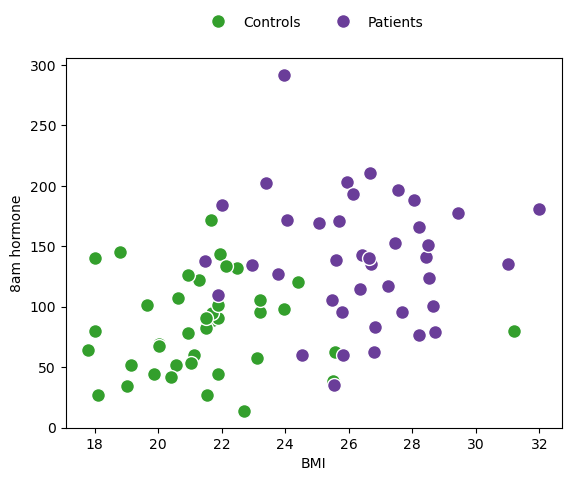

In [7]:
#Plot BMI v 8am hormone 
plt.figure()
plt.gca().set_facecolor('w')
hC1 = plt.plot(BMI[Controls], hormone[Controls], 'o', markersize=10, 
                markerfacecolor=plot_color[3], markeredgecolor='w')
hP1 = plt.plot(BMI[Patients], hormone[Patients], 'o', markersize=10, 
              markerfacecolor=plot_color[-1], markeredgecolor='w')
plt.xlabel('BMI')
plt.ylabel('8am hormone')
plt.box(True)

plt.legend([hC1[0], hP1[0]], ['Controls', 'Patients'], 
           loc='upper center', bbox_to_anchor=(0.5, 1.15), 
           ncol=2, frameon=False)
plt.show()



Great, you plotted the graph! But it looks like only the control data is being plotted.

**Task:**<span style="color:blue"> You need to plot the patient data on this scatter graph.</span>

<span style="color:blue">Go back to the section of code above. 'hC1' plots the control data. 'hP1' is the patient data.

<span style="color:blue">To plot the patient data, you need to add in the information to hP1 = plt.plot( , , , , , ), so it looks like hC1, where each bit of information means:

<span style="color:blue">plt.plot(x data, y data, shape of data point, size of data point, colour of data point, colour of the edge of data point)

<span style="color:blue">(The colour purple is the number '-1')</span>

**Step 7:** Now you have plotted the patient data, what do you think this plot shows? How would you describe the data? Are the clusters distinct? Would you confidently be able to say a participant has the disease or not? Discuss this with the class and see how we could improve the plot.

# Task 2

In this task we will look at what steps we can take to improve the outcomes of the analysis, so we can confidently distinguish between control and patients, so Doctors may use this information when deciding if a patient might have the disease or not.

One step we can take is to improve the actual data we have.

BMI is a fixed value, and while a persons weight may change over weeks or months, it won't change in the short term.
However, the hormone value was taken at 8am, but hormones levels change over the course of the day, so the value at 8am may not be representative of the patients actual hormone levels.

**In this case we can improve our data by looking at the hormone levels over 24 hours, rather than at one time point.**

**Step 8:** We will pick 4 examples to look at: 2 'normal' data points, and 2 outliers.
Outliers are data points that look very different from the rest of the data points in that group. They might have a much higher or lower value, so look very different on a graph.

Run the code below to see which data points we will use, and what their 8am hormone values are.

**Run this section of code...**

8am hormone values:
Control 1  =  27.13
Control 2  =  80.09
Patient 1  =  140.62
Patient 2  =  137.54


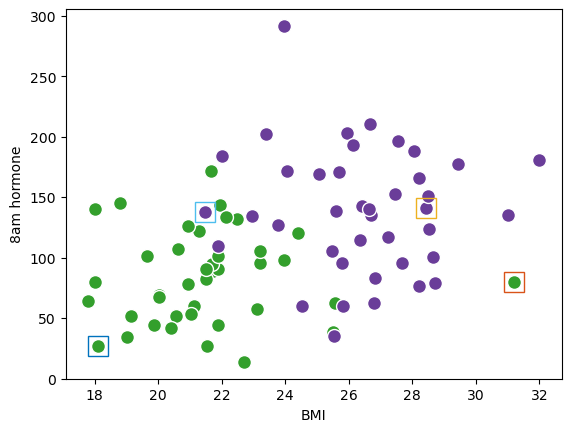

In [30]:
profiles = pd.read_csv('Hormone_profiles.csv').to_numpy()

partC = [17, 9];
partP = [52, 56];  # partP = [50, 71]

plt.figure()
plt.gcf().set_facecolor('w')

hC1 = plt.plot(BMI[Controls], hormone[Controls], 'o', markersize=10, markerfacecolor=plot_color[3, :], markeredgecolor='w')
hP1 = plt.plot(BMI[Patients], hormone[Patients], 'o', markersize=10, markerfacecolor=plot_color[-1, :], markeredgecolor='w')

sel = partC + partP

plt.plot(BMI[partC[0]], hormone[partC[0]], 's', markersize=15,  markerfacecolor="None" , markeredgecolor=colorplot[0, :], linewidth=2.5)
plt.plot(BMI[partC[1]], hormone[partC[1]], 's', markersize=15,  markerfacecolor="None", markeredgecolor=colorplot[1, :], linewidth=2.5)
plt.plot(BMI[partP[0]], hormone[partP[0]], 's', markersize=15,  markerfacecolor="None", markeredgecolor=colorplot[2, :], linewidth=2.5)
plt.plot(BMI[partP[1]], hormone[partP[1]], 's', markersize=15,  markerfacecolor="None", markeredgecolor=colorplot[3, :], linewidth=2.5)

plt.xlabel('BMI')
plt.ylabel('8am hormone')
plt.box(True)
print("8am hormone values:")
print("Control 1  = ", hormone[partC[0]])
print("Control 2  = ", hormone[partC[1]])
print("Patient 1  = ", hormone[partP[0]])
print("Patient 2  = ", hormone[partP[1]])

We have highlighted which data point we wil look at and what their 8am hormone values are.
Take a look at the 8am hormone values for Control 1 & 2 and Patient 1 & 2, which are higher?

**Step 9:** We will now plot the 24 hour hormone profiles for the 4 data points.

**Run this section of code...**

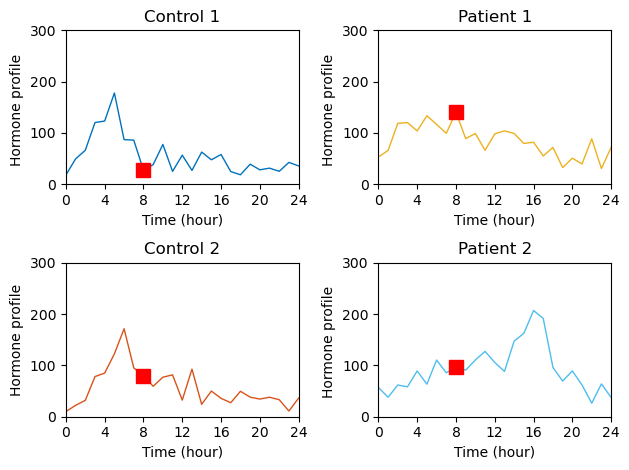

In [31]:
plt.figure()

plt.subplot(2, 2, 1)

plt.title('Control 1')
plt.plot(profiles[partC[0], :], linewidth=1, color=colorplot[0, :])
plt.plot(8, profiles[partC[0], 8], 's', markersize=10, markerfacecolor='r', markeredgecolor='r')
plt.xlim([1, 24])
plt.xticks([0, 4, 8, 12, 16, 20 , 24]) 
plt.xlabel('Time (hour)')
plt.ylim([0, 300])
plt.ylabel('Hormone profile ')
plt.box(True)

plt.subplot(2, 2, 2)

plt.title('Patient 1')
plt.plot(profiles[partP[0], :], linewidth=1, color=colorplot[2, :])
plt.plot(8, profiles[partP[0], 8], 's', markersize=10, markerfacecolor='r', markeredgecolor='r')
plt.xlim([1, 24])
plt.xticks([0, 4, 8, 12, 16, 20 , 24]) 
plt.xlabel('Time (hour)')
plt.ylim([0, 300])
plt.ylabel('Hormone profile ')
plt.box(True)

plt.subplot(2, 2, 3)

plt.title('Control 2')
plt.plot(profiles[partC[1], :], linewidth=1, color=colorplot[1, :])
plt.plot(8, profiles[partC[1], 8], 's', markersize=10, markerfacecolor='r', markeredgecolor='r')
plt.xlim([1, 24])
plt.xticks([0, 4, 8, 12, 16, 20 , 24]) 
plt.xlabel('Time (hour)')
plt.ylim([0, 300])
plt.ylabel('Hormone profile')
plt.box(True)

plt.subplot(2, 2, 4)

plt.title('Patient 2')
plt.plot(profiles[partP[1], :], linewidth=1, color=colorplot[3, :])
plt.plot(8, profiles[partP[1], 8], 's', markersize=10, markerfacecolor='r', markeredgecolor='r')
plt.xlim([1, 24])
plt.xticks([0, 4, 8, 12, 16, 20 , 24]) 
plt.xlabel('Time (hour)')
plt.ylim([0, 300])
plt.ylabel('Hormone profile ')
plt.box(True)
plt.tight_layout()
#plt.legend([hC1, hP1], ['Controls', 'Patients'], orientation='horizontal', bbox_to_anchor=(0.5, 1.05), loc='upper center', frameon=False)
plt.show()



**Step 10:** <span style="color:blue">Look at these 24 hour hormone profiles for the Control and Patients. What do they tell you? Compare them to each other. Discuss with the class what this might mean. </span>


# Task 3


Now we have plotted the individual 24 hour hormone profiles for these 4 idividuals we want to compare each hormone profile in a reliable way, rather than just looking at the graphs and comparing visually.

To do this we can look at what the **total hormone level** is over the whole day. This means adding up all of the data points over the 24 hours. So adding the value at 8am, 9am, 10am etc....

This process is also know as finding the **Area Under the Curve**.

**Step 11:**  Lets go through an example by hand first.

**Task:** <span style="color:blue">You will be given a worksheet titled **"Total hormone values"**. Use this sheet to calculate the total 24hr hormone value for Control 1. Once you have completed the sheet, move onto the next Task. </span>


**Task:**<span style="color:blue"> The code below calculates the total hormone value for each graph.
    
<span style="color:blue">To see what the values are, add this line of code to underneath the code below: **print("Total 24hr hormone value for Control 1 =", AUC_partC1)**</span>
 
<span style="color:blue">Repeat this for all values. Remember to change the text and label so it prints the correct statement for Control 1, Control 2, Patient 1, and Patient 2.</span>
    
 **Run this section of code...**

In [32]:
AUC_partC1 = np.sum(profiles[partC[0], :])
AUC_partC2 = np.sum(profiles[partC[1], :])
AUC_partP1 = np.sum(profiles[partP[0], :])
AUC_partP2 = np.sum(profiles[partP[1], :])
print("Total 24hr hormone value for Control 1 =", AUC_partC1)
print("Total 24hr hormone value for Control 2 =", AUC_partC2)
print("Total 24hr hormone value for Patient 1 =", AUC_partP1)
print("Total 24hr hormone value for patient 2 =", AUC_partP2)

Total 24hr hormone value for Control 1 = 1392.46
Total 24hr hormone value for Control 2 = 1417.8200000000002
Total 24hr hormone value for Patient 1 = 2108.67
Total 24hr hormone value for patient 2 = 2337.38


**Step 12:** The original 8am hormone values were:

Control 1  =  27.13

Control 2  =  80.09

Patient 1  =  140.62

Patient 2  =  137.54 

<span style="color:blue">How do the 24hr values compare to the 8am values? Do they show the same patterns? Is one value still higher than the other or have they switched? Can we learn anything from this?</span>

**Step 13:** As we have now shown that looking at the 24hr hormone profile for these 4 individuals may change how the data is presented, we now want to know the total 24hr hormone values for **all** control and patient data points. Then we can replot the **BMI** v **hormone** graph with the 24hr hormone values instead of the 8am hormone values, and see if we are able to better seperate the control and patient clusters.


**Task:** <span style="color:blue">To find the total 24hr hormone value for each data point, we can do this all at once with some code rather than calculating the total hormone profile individually (like we did for the 4 individuals).
    
<span style="color:blue">To do this, add this line of code to the beginning of the block of code below:

<span style="color:blue">"AUC = np.sum(profiles, axis=1)"</span>

**Run this section of code...**

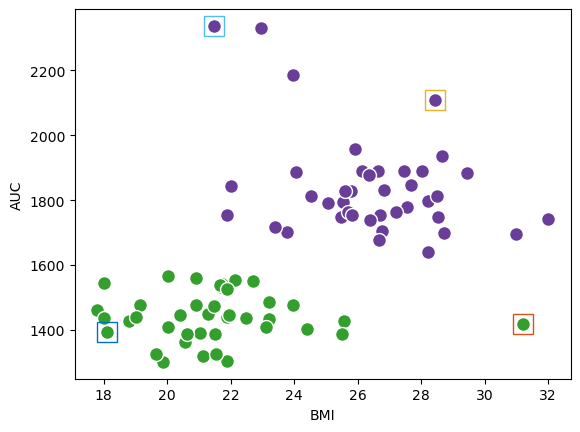

In [36]:
AUC = np.sum(profiles, axis=1)

plt.figure()
plt.gca().set_facecolor('w')
hC2 = plt.plot(BMI[Controls], AUC[Controls], 'o', markersize=10, markerfacecolor=plot_color[3, :], markeredgecolor='w')
hP2 = plt.plot(BMI[Patients], AUC[Patients], 'o', markersize=10, markerfacecolor=plot_color[-1, :], markeredgecolor='w')
plt.xlabel('BMI')
plt.ylabel('AUC')

for i in range(len(sel)):
    plt.plot(BMI[sel[i]], AUC[sel[i]], 's', markersize=15,markerfacecolor="None", markeredgecolor=colorplot[i, :], linewidth=2.5)

plt.box(True)
#plt.legend([hC2[0], hP2[0]], ['Controls', 'Patients'], loc='northoutside', ncol=2, frameon=False)
plt.show()



**Step 13:** <span style="color:blue">How does this graph compare to the original graph we plotted in **Task 2 , Step 8**? What are the benefits of using the 24hr hormones values over the 8am values? </span> 

# Task 4


Now we have been able to show the distinct cluster of control participants and patients, it's time to test how confident we feel about our results with 2 unknown participants. Will we be able to confidently identify if they are either a control or a patient?

**Step 14:** We will run this next section of code to see what the new participants hormone profiles look like, and where they sit on the graph. 

**Task:** <span style="color:blue">In this task you need to load in the data file and assign the correct BMI column to "New_BMI" and hormone columns to "New_profile".

- <span style="color:blue">Add in the data file for the new individuals "New_individuals.csv"
- <span style="color:blue"> Open the New_Individuals.csv file and identify which column is BMI and which columns are hormones. 
- <span style="color:blue">Label the BMI column: New_BMI = New_individuals[  ,  ] (Remember, [rows:columns], and in Python the first number is always 0!)
- <span style="color:blue"> Label the hormone columns: New_profile = New_individuals[  ,  ]
- <span style="color:blue">Hint: If you want **all** rows or **all** columns there is a special way to write this. Can you remember? If not have a look at preious blocks of code, or ask for help!


Then **Run this section of code...**

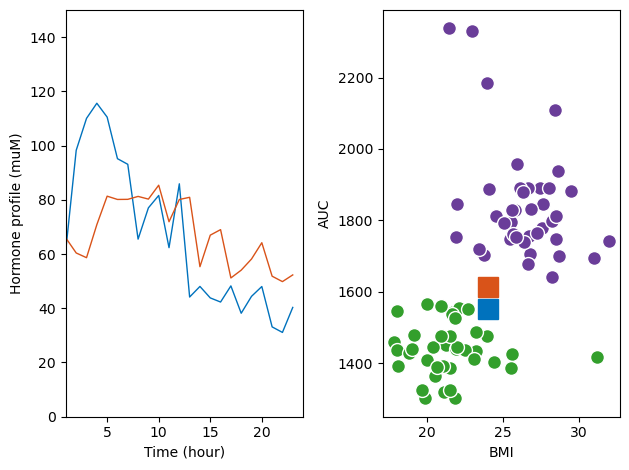

In [37]:

New_individuals = pd.read_csv('New_individuals.csv').to_numpy()

New_BMI = New_individuals[:, 5]
New_profile = New_individuals[:, 6:]
New_AUC = New_profile.sum(axis=1)

plt.figure()
plt.gcf().set_facecolor('w')

plt.subplot(1, 2, 1)
plt.plot(New_profile[0, :], linewidth=1, color=colorplot[0, :])
plt.plot(New_profile[1, :], linewidth=1, color=colorplot[1, :])
plt.xlim([1, 24])
plt.xlabel('Time (hour)')
plt.ylim([0, 150])
plt.ylabel('Hormone profile (muM)')
plt.box(True)

plt.subplot(1, 2, 2)
hC1 = plt.plot(BMI[Controls], AUC[Controls], 'o', markersize=10, markerfacecolor=plot_color[3, :], markeredgecolor='w')
hP1 = plt.plot(BMI[Patients], AUC[Patients], 'o', markersize=10, markerfacecolor=plot_color[-1, :], markeredgecolor='w')
plt.plot(New_BMI[0], New_AUC[0], 's', markersize=15, markerfacecolor=colorplot[0, :], markeredgecolor=colorplot[0, :], linewidth=2.5)
plt.plot(New_BMI[1], New_AUC[1], 's', markersize=15, markerfacecolor=colorplot[1, :], markeredgecolor=colorplot[1, :], linewidth=2.5)
plt.xlabel('BMI')
plt.ylabel('AUC')
plt.box(True)
plt.tight_layout()
plt.show()

Congratulations! You've now plotted the 24hr hormone profiles for the 2 new individuals, ad we can see where they sit on the graph.

**Step 15:** <span style="color:blue">Looking at the hormone profiles of the 2 new individuals and where they sit on the graph, would you confidently be able to say if they are a control or patient? Discuss this with the class. </span>

# Task 5

To help us confidently decide if these new individuals are either control or patients, we need a way to competely separate the two clusters...by drawing a line between the two that acts as a boundary. Anything above the line is patient, anything below the line is control.

But we can't just draw a line based on nothing. We can use a clever computer algorithm that draws a line based on the data, so we know the line is the most accurate and representative boundary based on our data.

This algorithm is called a **Support Vector Machine**

**Run the section of code below...**

<IPython.core.display.Javascript object>


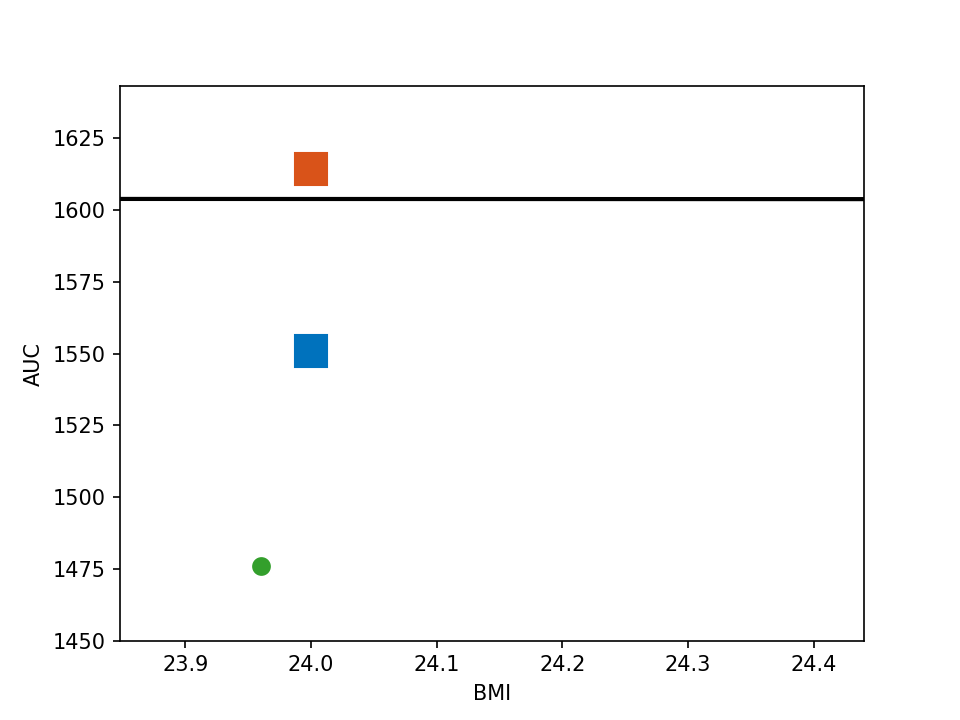

In [38]:
%matplotlib notebook
# Assuming BMI, AUC, condition, Controls, Patients, plot_color, New_BMI, New_AUC, colorplot are defined

# Fit SVM model
SVMModel = SVC(kernel='linear').fit(np.column_stack((BMI, AUC)), condition)
sv = SVMModel.support_vectors_
beta = SVMModel.coef_[0]
b = SVMModel.intercept_[0]

X1 = np.linspace(np.min(BMI), np.max(BMI), 100)
X2 = -(beta[0] / beta[1] * X1) - b / beta[1]

plt.figure()
plt.gca().set_facecolor('w')
hC4 = plt.plot(BMI[Controls], AUC[Controls], 'o', markersize=10, 
               markerfacecolor=plot_color[3, :], markeredgecolor='w')
hP4 = plt.plot(BMI[Patients], AUC[Patients], 'o', markersize=10, 
               markerfacecolor=plot_color[-1, :], markeredgecolor='w')
plt.plot(X1, X2, '-', linewidth=2, color='k')
plt.plot(New_BMI[0], New_AUC[0], 's', markersize=15, 
         markerfacecolor=colorplot[0, :], markeredgecolor=colorplot[0, :], linewidth=2.5)
plt.plot(New_BMI[1], New_AUC[1], 's', markersize=15, 
         markerfacecolor=colorplot[1, :], markeredgecolor=colorplot[1, :], linewidth=2.5)

plt.xlabel('BMI')
plt.ylabel('AUC')
plt.box(True)

#plt.legend([hC4[0], hP4[0]], ['Controls', 'Patients'], 
 #          orientation='horizontal', frameon=False, loc='upper center')
plt.show()

We can now see the line dividing the two clusters. You can zoom in to see if the data points are above or below the line by clicking the square button at the bottom of the graph which sits between the arrows and the save button, then drawing a square over the area you want to zoom in on. 

**Step 16:** <span style="color:blue"> Now we have used the SVM algorithm to separate the clusters with a line, are you now able to confidently say whether these 2 individuals are a control participant or patient?</span>

Congratulations!! You have now completed this workshop!

You have successfully:
- analysed a large dataset
- had experience coding
- visualised the data
- interpreted the data
- used this to inform decisions about future patients

The work you have completed is what real world data analysts, data scientists, and researchers are doing! This has a massive impact on patients and their experience with disease.  You're making a real impact!
